In [31]:
##!pip install torch
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [32]:
fruit_dir = r'C:\Users\micke\OneDrive\Documents\its 372\resized_images'

In [33]:
path  = fruit_dir

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

51


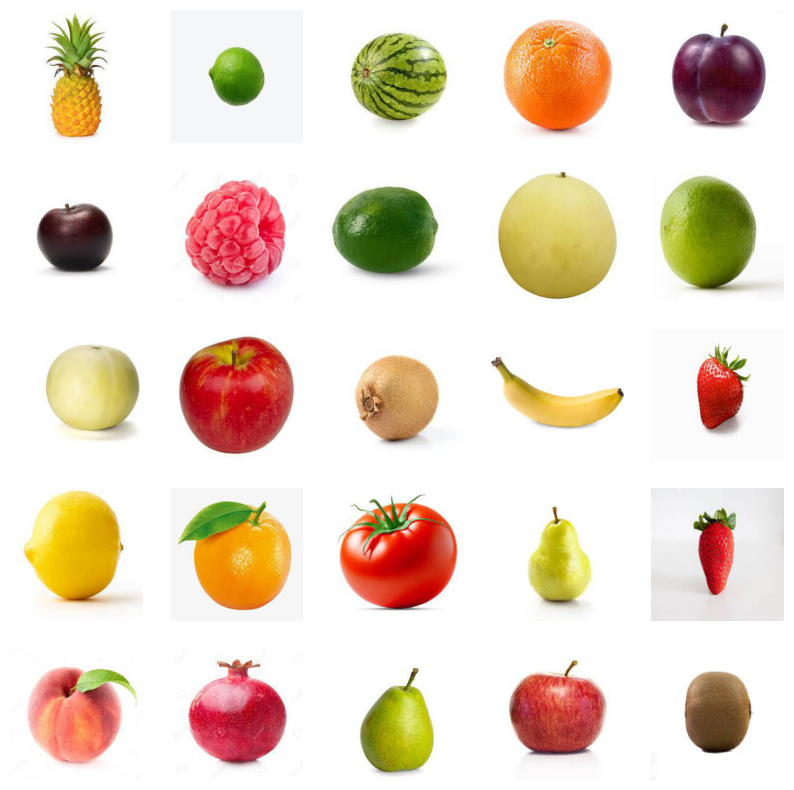

In [34]:
_, axes = plt.subplots(5, 5, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [35]:
def label_func2(fname):
    # Extract the filename without the directory path and extension
    fname = os.path.basename(fname)
    fname = os.path.splitext(fname)[0]
    
    # Split the filename by underscore
    temp_name = fname.split("_")

    # Extract and convert the label values
    y0 = temp_name[0]  # Extract the first part of the filename
    
    # Extract weight label if present
    weight_label = None
    if len(temp_name) > 1:
        weight_label = float(temp_name[1].replace("W-", "")) if "W-" in temp_name[1] else None
    
    # Extract color label if present
    color_label = None
    if len(temp_name) > 2:
        color_label = float(temp_name[2].replace("C-", "")) if "C-" in temp_name[2] else None
    
    # Extract roundness label if present
    roundness_label = None
    if len(temp_name) > 3:
        roundness_label = float(temp_name[3].replace("R-", "")) if "R-" in temp_name[3] else None
    
    # Extract texture label if present
    texture_label = None
    if len(temp_name) > 4:
        texture_label = float(temp_name[4].replace("T-", "")) if "T-" in temp_name[4] else None
    
    # Extract symmetry label if present
    symmetry_label = None
    if len(temp_name) > 5:
        symmetry_label = float(temp_name[5].replace("S-", "")) if "S-" in temp_name[5] else None
    
    return [fname, y0, weight_label, color_label, roundness_label, texture_label, symmetry_label]

In [36]:
all_paths = [os.path.join(fruit_dir, filename) for filename in os.listdir(fruit_dir) if filename.endswith((".jpg", ".png"))]

list_imgs_train = []
list_label_vectors = []

for img_name in all_paths:
    my_img = Image.open(img_name)
    my_img = my_img.resize((39, 140))

    img_np = np.array(my_img)

    list_imgs.append(img_np)
    list_label_vectors.append(label_func2(img_name))

In [37]:
X = list_imgs_train
y = list_label_vectors

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

list_ids_train = []
list_features_train = []
list_imgs_train = []


In [39]:
X_train[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [42]:
for index in range(len(X_train)):
    reg_vals = y_train[index]
    target = np.zeros(5)  # Assuming you have 5 conditions
    
    # Convert reg_vals to a string representation of conditions
    reg_vals_str = str(reg_vals)
    
    # Extracting conditions from reg_vals
    conditions = reg_vals_str.split('_')
    
    # Processing each condition
    for condition in conditions:
        if '-' in condition:
            condition_parts = condition.split('-')
            if len(condition_parts) == 2:
                condition_name, condition_value = condition_parts
                if condition_name == 'W':
                    target[0] = float(condition_value)
                elif condition_name == 'C':
                    target[1] = float(condition_value)
                elif condition_name == 'R':
                    target[2] = float(condition_value)
                elif condition_name == 'T':
                    target[3] = float(condition_value)
                elif condition_name == 'S':
                    target[4] = float(condition_value)

    single_np_img = X_train[index]

    list_ids_train.append(reg_vals[0])
    list_imgs_train.append(single_np_img)
    list_features_train.append(target)

In [43]:
list_imgs_train[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]]

In [45]:
for index in range(len(X_test)):
    reg_vals = y_test[index]
    target = np.zeros(5)  # Assuming you have 5 conditions
    
    # Convert reg_vals to a string representation of conditions
    reg_vals_str = str(reg_vals)
    
    # Extracting conditions from reg_vals
    conditions = reg_vals_str.split('_')
    
    # Processing each condition
    for condition in conditions:
        if '-' in condition:
            condition_parts = condition.split('-')
            if len(condition_parts) == 2:
                condition_name, condition_value = condition_parts
                if condition_name == 'W':
                    target[0] = float(condition_value)
                elif condition_name == 'C':
                    target[1] = float(condition_value)
                elif condition_name == 'R':
                    target[2] = float(condition_value)
                elif condition_name == 'T':
                    target[3] = float(condition_value)
                elif condition_name == 'S':
                    target[4] = float(condition_value)

    single_np_img = X_test[index]

    list_ids_test.append(reg_vals[0])
    list_imgs_test.append(single_np_img)
    list_features_test.append(target)

In [46]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [47]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(40, 5)
(11, 5)


In [48]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [49]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [50]:
list_imgs_train[17]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 254],
        [255, 255, 255],
        [255, 255, 255]]

In [51]:
list_imgs_train[17].shape

(140, 39, 3)

In [52]:
list_imgs_train_stretched = [the_img_np.reshape(-1) for the_img_np in list_imgs_train]

In [53]:
list_imgs_train_stretched[0]

array([251, 251, 251, ..., 251, 251, 251], dtype=uint8)

In [54]:
list_imgs_train_stretched[4].shape

(16380,)

In [55]:
list_imgs_train_stretched[4][:1000]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 253,
       255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [56]:
# Check the shape of the flattened array
print(list_imgs_train_stretched[7].shape)

# Attempt to reshape the array
try:
    image_reshaped = list_imgs_train_stretched[7].reshape((140, 39))
    print("Reshape successful")
except ValueError as e:
    print("Reshape failed:", e)

(16380,)
Reshape failed: cannot reshape array of size 16380 into shape (140,39)


In [57]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [58]:
np_list_imgs_train_stretched.shape

(40, 16380)

In [59]:
np_list_imgs_train_stretched[3]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [60]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [61]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379
0,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9,245,246,248,245,246,248,245,246,248,245,...,248,245,246,248,245,246,248,245,246,248


In [62]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")

In [63]:
url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [64]:
url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [65]:
url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

In [66]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [75]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [76]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )

[[0.  0.1 0.6 0.4 0. ]
 [0.  0.4 0.  0.9 0. ]
 [0.  0.2 0.  1.  0. ]
 [0.  0.3 0.1 0.5 0. ]
 [0.  0.9 0.2 0.7 0. ]
 [0.  0.1 0.1 1.  0. ]
 [0.  0.7 0.2 0.8 0. ]
 [0.  0.1 0.1 1.  0. ]
 [0.  0.  0.2 1.  0. ]
 [0.  0.  0.1 1.  0. ]]


In [77]:
def generate_img_per_index(index):
    print("Before predict call")  # Add this line
    selected_imgs_to_avg = predict(conditions_matrix_test[index])
    print("After predict call")  # Add this line
    the_test_conditions = conditions_matrix_test[index]

    # Check the shape of selected_imgs_to_avg
    print("Shape of selected_imgs_to_avg:", selected_imgs_to_avg.shape)

    # Print the indices causing the error
    print("Indices causing the error:", [i for i, img in enumerate(selected_imgs_to_avg) if img.size != 16380])

    # Reshape the images if necessary
    selected_imgs_to_avg = [img.reshape((140, 39)) if img.size == 16380 else img for img in selected_imgs_to_avg]

    # Convert to numpy array
    selected_imgs_to_avg = np.array(selected_imgs_to_avg)

    # Take the mean along the first axis (num_images)
    avg_gen_img = np.mean(selected_imgs_to_avg, axis=0)
    avg_gen_img = avg_gen_img.astype(int)

    # Check the shape of avg_gen_img
    print("Shape of avg_gen_img:", avg_gen_img.shape)

    # Convert the average generated image to PIL format
    gen_pil_image = Image.fromarray(avg_gen_img)

    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)

    return the_test_conditions, gen_pil_image, real_pil_image

In [78]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")

Before predict call
[ 2 35 34]


ValueError: cannot reshape array of size 16380 into shape (140,39)